### Dimension Reduction (차원 축소)
- 우리가 다루는 데이터들은 보통 3차원 공간에서는 표현하기 힘든 고차원의 데이터인 경우가 많다.
- 차원이 커질 수록 데이터 간 거리가 크게 늘어나며, 데이터가 희소화된다.
- 고차원을 이루는 feature 중 상대적으로 중요도가 떨어지는 feature가 존재할 수 있기 때문에  
  계산 비용이 많이 들고 분석에 필요한 시각화가 어렵다.
- 머신러닝에서는 고차원 데이터를 다루는 경우가 많으며, 희소 데이터를 학습 시 예측 성능이 좋지 않다.
- 차원 축소를 통해 Spares Data를 Dense하게 만들 필요가 있다.
- feature가 많을 경우 독립변수 간 상관관계가 높아질 가능성이 높고, 이로 인해 다중 공선성문제가 발생할 수 있다.
- 차원 축소로 인해 표현력이 일부 손실되지만, 손실을 감수하더라도 계산 효율을 얻기 위해 사용한다.

---
#### PCA (Principal Component Analysis), 주성분 분석
- 고차원의 데이터를 저차원으로 압축하는 대표적인 차원 축소방법이다.
- 데이터의 특성을 눈으로 쉽게 파악할 수 있도록 하며, 연산 속도에 큰 이점을 얻을 수 있다.
- 고차원 데이터를 저차원 데이터로 압축하기 위해서는 먼저, 데이터를 가장 잘 표현하는 축을 설정해야 한다.
- 2차원 공간에서 1차원 공간으로 차원 축소를 진행하면, 1차원 공간상에서 데이터 분포가 가장 넓게 퍼지게 만드는 고유 벡터를 찾아야 한다.
- 고유 벡터를 찾았다면 feature 데이터들을 고유 벡터 축에 투영시킴으로써 주 성분을 찾아낼 수 있게 된다.

<div style="display: flex">
    <div>
        <img src="./images/pca01.gif" style="margin-left: -200px">
    </div>
    <div>
        <img src="./images/pca02.gif" width="700" style="margin-top:50px; margin-left: -350px">
    </div>
</div>


#### LDA (Linear Discriminant Analysis)
- PCA와 유사하지만, 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소한다.
- PCA는 가장 큰 분산을 가지는 축을 찾았지만, LDA는 입력 데이터의 클래스를 최대한 분리할 수 있는 축을 찾는다.
- 클래스를 최대한 분리하기 위해서 클래스 간 분산을 최대화하고 클래스 내부 분산을 최소화 하는 방식으로 차원을 축소한다.

<div style="display: flex">
    <div>
        <img src="./images/lda01.png" width="650" style="margin:20px; margin-left: -20px">
    </div>
    <div>
        <img src="./images/lda02.png" width="650" style="margin:20px; margin-left: 0">
    </div>
</div>

### PCA

In [1]:
import pandas as pd

# 데이터 호출
c_df = pd.read_csv('./datasets/company.csv')

# 데이터 크기 확인
c_df.shape

(6819, 96)

In [2]:
c_df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [3]:
# 결측치 확인
c_df.isna().sum().sum()

0

In [4]:
# 중복행 확인
c_df.duplicated().sum()

0

In [5]:
# 타겟 데이터 비중 확인
c_df['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = c_df.iloc[:, 1:], c_df.iloc[:, 0]

# 문제/정답 및 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# SMOTE (over sampling)
# smote 객체 생성
smote = SMOTE(random_state=124)
# over sampling 진행
over_X_train, over_y_train = smote.fit_resample(X_train, y_train)

In [7]:
# 학습 및 테스트 데이터로 병합
train_df = pd.concat([over_X_train, over_y_train], axis=1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [8]:
display(train_df)
display(test_df)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
0,0.527422,0.591856,0.583704,0.622162,0.622162,0.999261,0.797823,0.809745,0.303672,0.782017,...,0.005315,0.628592,0.622162,0.842161,0.279095,0.026858,0.565456,1,0.032165,0
1,0.545556,0.627889,0.614273,0.638810,0.638810,0.999155,0.797627,0.809570,0.303550,0.781838,...,0.000247,0.623997,0.638811,0.842665,0.275958,0.026791,0.565158,1,0.086043,0
2,0.484766,0.547045,0.533969,0.605760,0.605760,0.999024,0.797406,0.809328,0.303439,0.781587,...,0.001780,0.623756,0.605759,0.840719,0.285387,0.027386,0.566973,1,0.019274,0
3,0.551894,0.590438,0.598533,0.628180,0.628180,0.999212,0.797747,0.809583,0.303641,0.781866,...,0.009973,0.623528,0.628177,0.842113,0.277347,0.026810,0.565247,1,0.046547,0
4,0.471165,0.543611,0.524225,1.000000,1.000000,0.975215,0.850681,0.864386,0.446321,0.829203,...,0.012686,0.623249,1.000000,0.840477,0.279132,0.027171,0.566490,1,0.031980,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10553,0.506108,0.561416,0.561612,0.599945,0.599943,0.999044,0.797418,0.809340,0.303416,0.781608,...,0.044506,0.625370,0.599946,0.840965,0.285421,0.028383,0.568169,1,0.019347,1
10554,0.373526,0.422820,0.417053,0.600222,0.602531,0.998922,0.797060,0.809006,0.303047,0.781250,...,0.000475,0.624070,0.600222,0.834406,0.279213,0.027879,0.565880,1,0.038381,1
10555,0.463784,0.526896,0.517182,0.609819,0.609710,0.998970,0.797343,0.809275,0.303442,0.781527,...,0.001592,0.623624,0.609814,0.839435,0.284604,0.026056,0.553571,1,0.019989,1
10556,0.491769,0.550445,0.544569,0.603213,0.603229,0.999046,0.797410,0.809328,0.303400,0.781564,...,0.021047,0.640592,0.603213,0.840285,0.284376,0.031065,0.569177,1,0.020216,1


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
0,0.549749,0.577682,0.610579,0.601133,0.601133,0.999071,0.797474,0.809395,0.303458,0.781667,...,0.005289,0.623871,0.601128,0.841743,0.278991,0.027171,0.566490,1,0.032693,0
1,0.470092,0.535216,0.522833,0.600513,0.600513,0.998989,0.797385,0.809311,0.303475,0.781577,...,0.004037,0.624088,0.600514,0.840169,0.283945,0.028439,0.568229,1,0.020681,0
2,0.542485,0.592782,0.584078,0.603288,0.603288,0.999051,0.797496,0.809389,0.303540,0.781653,...,0.001678,0.623808,0.603283,0.842737,0.280952,0.026845,0.565402,1,0.025668,0
3,0.551894,0.608646,0.599550,0.613096,0.613485,0.999189,0.797694,0.809558,0.303595,0.781811,...,0.009194,0.625369,0.613094,0.842930,0.277866,0.026791,0.565160,1,0.040628,0
4,0.577292,0.634649,0.620376,0.608253,0.608246,0.999081,0.797578,0.809465,0.303621,0.781735,...,0.002285,0.624002,0.608255,0.843327,0.277128,0.026791,0.565159,1,0.049796,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,0.574465,0.637375,0.619680,0.600376,0.600376,0.999030,0.797528,0.809426,0.303640,0.781691,...,0.001718,0.624151,0.600375,0.844727,0.279977,0.026795,0.565178,1,0.028513,0
1360,0.539219,0.591965,0.581455,0.614350,0.614711,0.999145,0.797600,0.809474,0.303523,0.781738,...,0.001426,0.624051,0.614345,0.842158,0.276636,0.026791,0.565158,1,0.059747,0
1361,0.432994,0.468873,0.465228,0.601616,0.601623,0.998934,0.797344,0.809264,0.303518,0.781520,...,0.001635,0.623758,0.601616,0.835326,0.286225,0.026791,0.565158,1,0.018618,0
1362,0.473505,0.514501,0.527973,0.595122,0.595122,0.998915,0.797293,0.809230,0.303470,0.781480,...,0.003421,0.623529,0.595122,0.839280,0.277495,0.026552,0.563684,1,0.044640,0


In [9]:
from sklearn.decomposition import PCA

# 차원 축소 객체 생성
# n_components: 얼마나 차원축소할 건지 작성
pca = PCA(n_components=2)

# 타겟을 제외하고 피처만 차원 축소
pca_train = pca.fit_transform(train_df.iloc[:, :-1])
pca_test = pca.fit_transform(test_df.iloc[:, :-1])

# 크기 확인
print(pca_train.shape, pca_test.shape)

(10558, 2) (1364, 2)


In [10]:
# train
# 컬럼명 설정
pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]

# 차원 축소 데이터 프레임 생성
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
# 타겟 데이터 추가
pca_train_df.loc[:, 'target'] = train_df['Bankrupt?']

# test
# 컬럼명 설정
pca_columns = [f'pca{i + 1}' for i in range(pca_test.shape[1])]

# 차원 축소 데이터 프레임 생성
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
# 타겟 데이터 추가
pca_test_df.loc[:, 'target'] = test_df['Bankrupt?']

In [11]:
display(pca_train_df)
display(pca_test_df)

,pca1,pca2,target
0,-3.944863e+09,2.486815e+09,0
1,-3.371627e+09,-1.888395e+09,0
2,-2.031608e+09,5.390768e+08,0
3,5.652555e+09,4.194120e+09,0
4,-2.989820e+09,-1.340758e+09,0
...,...,...,...
10553,1.394210e+09,-3.174068e+09,1
10554,-3.386125e+09,-1.284149e+09,1
10555,-2.900791e+09,1.924493e+09,1
10556,1.263804e+09,4.013630e+09,1


,pca1,pca2,target
0,4.340376e+09,-2.180991e+08,0
1,-2.526674e+09,-2.512215e+09,0
2,7.242591e+09,2.208732e+09,0
3,2.163334e+09,-5.951263e+09,0
4,5.469018e+09,4.236459e+09,0
...,...,...,...
1359,5.983643e+09,-6.742861e+08,0
1360,-1.036574e+09,-7.707320e+08,0
1361,-5.589738e+08,-1.866977e+09,0
1362,2.053825e+09,-4.051368e+09,0


In [12]:
# 보존률 확인
# 각각의 피처가 얼만큼 설명하고 있는지
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.21421998 0.16121997]
0.3754399445273018


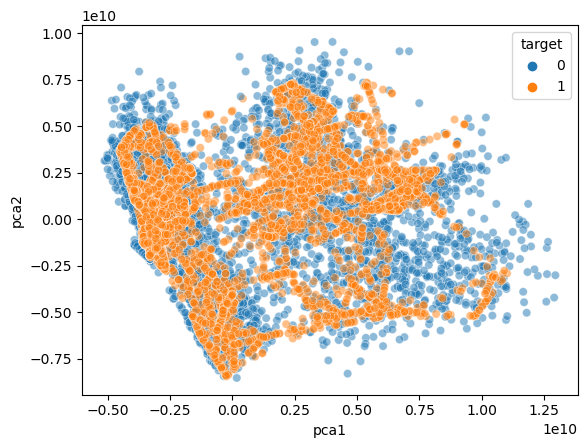

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# 산점도 출력
sns.scatterplot(x="pca1", y="pca2", hue='target', data=pca_train_df, alpha=0.5)
plt.show()

# 겹치면 차원 늘리기
# 반반 나눠져 있으면 2차원 사용 가능

In [14]:
from sklearn.decomposition import PCA

# 차원축소 객체 생성 (5차원)
pca = PCA(n_components=5)

# 학습 및 테스트 데이터로 병합
pca_train = pca.fit_transform(train_df.iloc[:, :-1])
pca_test = pca.fit_transform(test_df.iloc[:, :-1])

# 크기 확인
print(pca_train.shape, pca_test.shape)

(10558, 5) (1364, 5)


In [15]:
# train
# 컬럼명 설정
pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]

# 차원 축소 데이터 프레임 생성
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
# 타겟 데이터 추가
pca_train_df.loc[:, 'target'] = train_df['Bankrupt?']

# test
# 컬럼명 설정
pca_columns = [f'pca{i + 1}' for i in range(pca_test.shape[1])]

# 차원 축소 데이터 프레임 생성
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
# 타겟 데이터 추가
pca_test_df.loc[:, 'target'] = test_df['Bankrupt?']

In [16]:
# 보존률 확인
# 각각의 피처가 얼만큼 설명하고 있는지
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.21421998 0.16121997 0.13168396 0.1242189  0.11207448]
0.7434172923920861


In [17]:
# 사용할 수 있는 키 확인
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]
# 파라미터 값 조정
parameters = {'max_depth': [5, 10, 20], 'min_samples_split': [10, 50, 100]}

# 분류 모델 객체 생성
rfc = RandomForestClassifier()

# 파라미터 값 설정
g_rfc = GridSearchCV(rfc, param_grid=parameters, cv=5, return_train_score=True, scoring='accuracy')

# 훈련
g_rfc.fit(features, targets)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='accuracy')

In [19]:
# 훈련 결과 확인
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 10}",0.730629,7
1,"{'max_depth': 5, 'min_samples_split': 50}",0.725042,8
2,"{'max_depth': 5, 'min_samples_split': 100}",0.723431,9
3,"{'max_depth': 10, 'min_samples_split': 10}",0.849498,3
4,"{'max_depth': 10, 'min_samples_split': 50}",0.831785,5
5,"{'max_depth': 10, 'min_samples_split': 100}",0.808770,6
6,"{'max_depth': 20, 'min_samples_split': 10}",0.896572,1
7,"{'max_depth': 20, 'min_samples_split': 50}",0.860769,2
8,"{'max_depth': 20, 'min_samples_split': 100}",0.833396,4


In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[1239   81]
 [  37    7]]
정확도: 0.9135, 정밀도: 0.0795, 재현율: 0.1591, F1: 0.1061, ROC-AUC: 0.5489
################################################################################


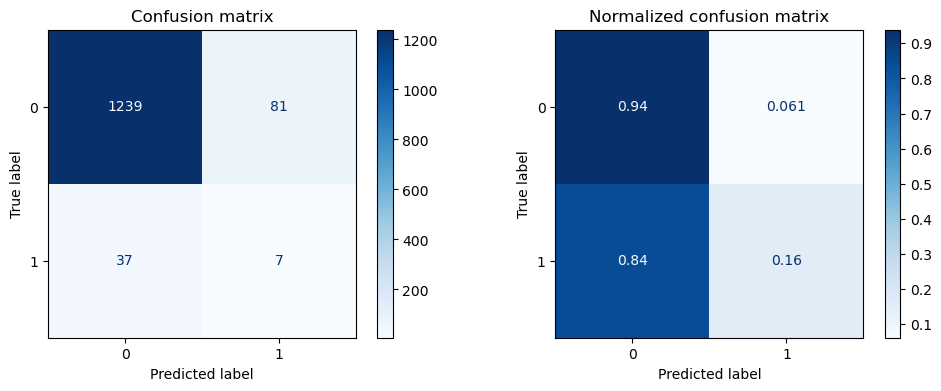

In [21]:
# 테스트 데이터 세트 분리
X_test, y_test = pca_test_df.iloc[:, :-1], pca_test_df.iloc[:, -1]

# 최적의 모델 담기
rfc = g_rfc.best_estimator_

# 예측
prediction = rfc.predict(X_test)
# 평가 (오차행렬)
get_evaluation(y_test, prediction, rfc, X_test)

#### LDA

In [22]:
import pandas as pd

# 데이터 호출
c_df = pd.read_csv('./datasets/company.csv')

# 데이터 크기 확인
c_df.shape

(6819, 96)

#### ❗ 이슈
ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

클래스 종류보다 -1 했을 때보다 클 수 없음
이진분류는 반드시 1차원으로 축소

In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = c_df.iloc[:, 1:], c_df.iloc[:, 0]

# 문제/정답 및 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# SMOTE (over sampling)
# smote 객체 생성
smote = SMOTE(random_state=124)
# over sampling 진행
over_X_train, over_y_train = smote.fit_resample(X_train, y_train)

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 차원 축소 객체 생성
# n_components: 얼마나 차원축소할 건지 작성
lda = LinearDiscriminantAnalysis(n_components=1)

# 타겟을 제외하고 피처만 차원 축소
lda_train = lda.fit_transform(train_df.iloc[:, :-1], train_df.iloc[:, -1])
lda_test = lda.fit_transform(test_df.iloc[:, :-1], test_df.iloc[:, -1])

# 크기 확인
print(lda_train.shape, lda_test.shape)

(10558, 1) (1364, 1)


In [25]:
# train
# 컬럼명 설정
lda_columns = [f'lda{i + 1}' for i in range(lda_train.shape[1])]

# 차원 축소 데이터 프레임 생성
lda_train_df = pd.DataFrame(lda_train, columns=lda_columns)
# 타겟 데이터 추가
lda_train_df.loc[:, 'target'] = train_df['Bankrupt?']

# test
# 컬럼명 설정
lda_columns = [f'lda{i + 1}' for i in range(lda_test.shape[1])]

# 차원 축소 데이터 프레임 생성
lda_test_df = pd.DataFrame(lda_test, columns=lda_columns)
# 타겟 데이터 추가
lda_test_df.loc[:, 'target'] = test_df['Bankrupt?']

In [26]:
display(lda_train_df)
display(lda_test_df)

,lda1,target
0,-0.970790,0
1,-2.228185,0
2,-0.387147,0
3,-0.942862,0
4,-2.573494,0
...,...,...
10553,0.471820,1
10554,0.404667,1
10555,0.138184,1
10556,0.851615,1


,lda1,target
0,-0.123192,0
1,0.418499,0
2,-0.284541,0
3,-0.305360,0
4,-1.058873,0
...,...,...
1359,-0.423052,0
1360,-0.843648,0
1361,0.905226,0
1362,0.015444,0


In [27]:
# 보존률 확인
# 각각의 피처가 얼만큼 설명하고 있는지
print(lda.explained_variance_ratio_)
print(lda.explained_variance_ratio_.sum())

[1.]
1.0


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = lda_train_df.iloc[:, :-1], lda_train_df.iloc[:, -1]
# 파라미터 값 조정
parameters = {'max_depth': [5, 10, 20], 'min_samples_split': [10, 50, 100]}

# 분류 모델 객체 생성
rfc = RandomForestClassifier()

# 파라미터 값 설정
g_rfc = GridSearchCV(rfc, param_grid=parameters, cv=5, return_train_score=True, scoring='accuracy')

# 훈련
g_rfc.fit(features, targets)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='accuracy')

In [29]:
# 훈련 결과 확인
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 10}",0.895055,4
1,"{'max_depth': 5, 'min_samples_split': 50}",0.895624,2
2,"{'max_depth': 5, 'min_samples_split': 100}",0.895719,1
3,"{'max_depth': 10, 'min_samples_split': 10}",0.891267,7
4,"{'max_depth': 10, 'min_samples_split': 50}",0.893824,6
5,"{'max_depth': 10, 'min_samples_split': 100}",0.895245,3
6,"{'max_depth': 20, 'min_samples_split': 10}",0.876587,9
7,"{'max_depth': 20, 'min_samples_split': 50}",0.891077,8
8,"{'max_depth': 20, 'min_samples_split': 100}",0.893919,5


In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[833 487]
 [ 13  31]]
정확도: 0.6334, 정밀도: 0.0598, 재현율: 0.7045, F1: 0.1103, ROC-AUC: 0.6678
################################################################################


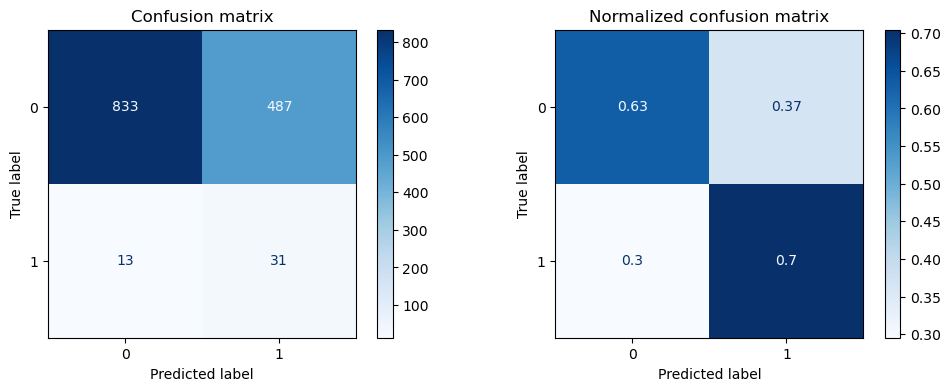

In [31]:
# 테스트 데이터 세트 분리
X_test, y_test = lda_test_df.iloc[:, :-1], lda_test_df.iloc[:, -1]

# 최적의 모델 담기
rfc = g_rfc.best_estimator_

# 예측
prediction = rfc.predict(X_test)
# 평가 (오차행렬)
get_evaluation(y_test, prediction, rfc, X_test)